<a href="https://colab.research.google.com/github/kumareshvj/Machine-learing---Regression/blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

**Data Preprocessing** : 

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :** 

1.

2.

3.

4.

5.

6.

**Supervised Machine learning algorithms and implementation :**

1. Lasso regression

2. Ridge regression

3. Elastic net regression


# **GitHub Link -**

https://github.com/kumareshvj/Machine-learing---Regression

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [507]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
from matplotlib import rc
from pylab import rcParams

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

### Dataset Loading

In [508]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/AlmaBetter/capstone project/Machine_learning_regression/data_YesBank_StockPrices.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [509]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [510]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [511]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [512]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [513]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

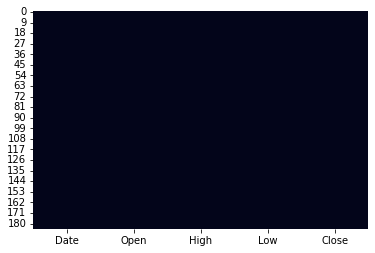

In [514]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar = False)

### What did you know about your dataset?

The dataset consists of five columns - open, close, high, low. There are no duplicated values, and there are no null values in the dataset. Dataset consists of 185 rows.

## ***2. Understanding Your Variables***

In [515]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [516]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

Open - Opening price

Close - Closing price

Low - lowest price in the date

High - Highest price in the date 

### Check Unique Values for each variable.

In [517]:
# Check Unique Values for each variable.
for i in df.columns.to_list():
  print('''No of unique variable in''' ,i.lower() ,'''is''' ,df[i].nunique())



No of unique variable in date is 185
No of unique variable in open is 183
No of unique variable in high is 184
No of unique variable in low is 183
No of unique variable in close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [518]:
df['Date'].unique()

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

In [519]:
# Getting highest and lowest traded price of the stock
Highest_stock_Price = df['Close'].max()
print(f'Highest price of the stock is {Highest_stock_Price}')

Lowest_stock_price = df['Close'].min()
print(f'Lowest price of the stock is {Lowest_stock_price}')

Highest price of the stock is 367.9
Lowest price of the stock is 9.98


In [520]:
# Creating a new column for year extrating the data from date
df['year'] = df['Date'].apply(lambda x:x[-2:])
df.head()
df_avg_price_year = df.groupby('year')['Close'].median().reset_index()
df_avg_price_year.head()

,year,Close
0,05,13.355
1,06,18.245
2,07,36.485
3,08,26.140
4,09,30.805


In [521]:
#Getting precentage of stock price year wise
divide = [12.46]
percentage = []
for i in df_avg_price_year['Close'].to_list():
  divide.append(i)
  value = (divide.index(i))-1
 
  x = round(((i/divide[value])*100)-100,2)
  percentage.append(x)

print(percentage)
 
    



[7.18, 36.62, 99.97, -28.35, 17.85, 89.19, -0.75, 23.55, 11.76, 37.78, 49.51, 37.54, 37.92, 6.04, -69.78, -77.55]


In [522]:
# Getting one day percentage of movement from open to close
df['Onedaychange'] = ((df['Close']-df['Open'])/df['Open'])*100
df['Onedaychange'].head()

0   -4.153846
1    6.677266
2   -1.335312
3   -1.590909
4    0.449438
Name: Onedaychange, dtype: float64

In [523]:
# getting the single day perentage from low to high
df['singledaychange_low_high'] = ((df['High'] - df['Low'])/df['Low'])*100



In [524]:
df['singledaychange_low_high'].min()

6.103442541160827

In [525]:
df['singledaychange_low_high'].max()

1484.6846846846847

In [526]:
df['Onedaychange'].min()

-53.3203125

In [527]:
df['Onedaychange'].max()

67.73809523809524

In [528]:
# creating the column formatted date in data format instead of string
df['Formatted_date']=df.apply(lambda x : datetime.strptime(x['Date'],'%b-%y'),axis=1)
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,24.444444,2005-07-01
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,18.565737,2005-08-01
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,21.189894,2005-09-01
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,16.693548,2005-10-01
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,7.763975,2005-11-01


In [529]:
# creating the column for the month
df['month'] = df['Date'].apply(lambda x:x[:3])
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date,month
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,24.444444,2005-07-01,Jul
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,18.565737,2005-08-01,Aug
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,21.189894,2005-09-01,Sep
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,16.693548,2005-10-01,Oct
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,7.763975,2005-11-01,Nov


In [530]:
# Creating the column for result to check whether the day stock price ended with positive, negative or unchanged
df['Result'] = np.where(df.Onedaychange > 0,'positive',(np.where(df.Onedaychange < 0,'negative','unchanged')))
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date,month,Result
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,24.444444,2005-07-01,Jul,negative
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,18.565737,2005-08-01,Aug,positive
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,21.189894,2005-09-01,Sep,negative
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,16.693548,2005-10-01,Oct,negative
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,7.763975,2005-11-01,Nov,positive


In [531]:
# creating the column new column to check whether day opeing is high or low compared with the last day closing 

# Below we are copy the the close data and shifting to next day
shifted = False
df1 = df[['Close']].copy()
if not shifted:
  df1[0:] = df1[0:].shift(1)
  df1.loc[0] = [13]
  shifted = True
df1.head()

#After creating the shifted data column we are separating with opening price of the column
df['daily_opening_change'] = (df['Open'] - df1['Close'])

In [532]:
# getting the new column by checking the 
df['daily_opening'] = np.where(df.daily_opening_change > 0,'Gap_up',(np.where(df.daily_opening_change < 0,'Gap_Down','unchanged')))
df.head()

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date,month,Result,daily_opening_change,daily_opening
0,Jul-05,13.00,14.00,11.25,12.46,05,-4.153846,24.444444,2005-07-01,Jul,negative,0.00,unchanged
1,Aug-05,12.58,14.88,12.55,13.42,05,6.677266,18.565737,2005-08-01,Aug,positive,0.12,Gap_up
2,Sep-05,13.48,14.87,12.27,13.30,05,-1.335312,21.189894,2005-09-01,Sep,negative,0.06,Gap_up
3,Oct-05,13.20,14.47,12.40,12.99,05,-1.590909,16.693548,2005-10-01,Oct,negative,-0.10,Gap_Down
4,Nov-05,13.35,13.88,12.88,13.41,05,0.449438,7.763975,2005-11-01,Nov,positive,0.36,Gap_up


In [533]:
df.Result.value_counts()

positive    100
negative     85
Name: Result, dtype: int64

In [534]:
df.daily_opening.value_counts()

Gap_up       128
Gap_Down      48
unchanged      9
Name: daily_opening, dtype: int64

### What all manipulations have you done and insights you found?

We have manipulated the date to check the below points:
- Precentage of movement in a day with repesect to opening price and closing price
- Precentage of movement in a day with repesect to low and high price
- Result of the date whether it is positive or negative
- checked whether the opeing price is up, down or unchanged with repsect to previous date closing price


Insights about the data:
- Lowest price of the stock is 9.68 and the hightest price of the stock is 367.9
- After 2018 there is a massive decline in the stock price
- Total 100 months add the positive upward movement of price and 85 months downward movement of price by comparing the previous month price
- In a month it at around 128 gap up movement and 48 had gap down movement and 9 unchanged movement.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

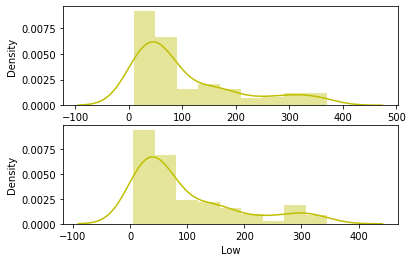

In [535]:
# Chart - 3 visualization code
plt.subplot(2,1,1)
sns.distplot(df['Open'],color ='y')
plt.subplot(2,1,2)
sns.distplot(df['Low'],color = 'y')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution price 

##### 2. What is/are the insight(s) found from the chart?

We can see the data is highly skewed to the right, so we need to do transformation to the make the data normal distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight for the business, as we are checking the stock price.

#### Chart - 2

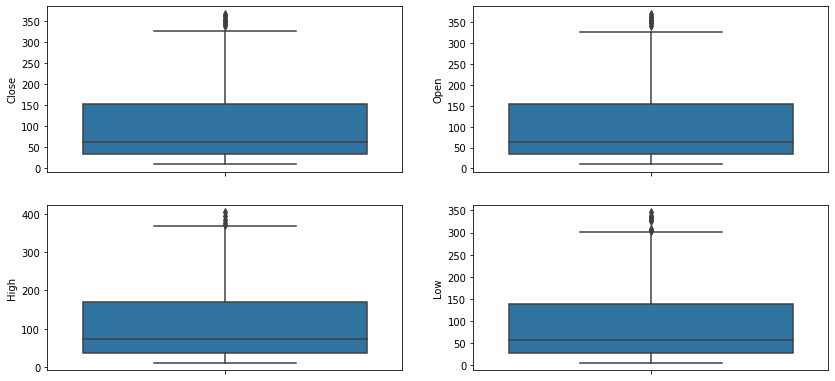

In [536]:
# Chart - 4 visualization code
plt.figure(figsize=(14, 14))
plt.subplot(4,2,1)
sns.boxplot(y=df['Close'])
plt.subplot(4,2,2)
sns.boxplot(y=df['Open'])
plt.subplot(4,2,3)
sns.boxplot(y=df['High'])
plt.subplot(4,2,4)
sns.boxplot(y=df['Low'])
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution price in percentile.

##### 2. What is/are the insight(s) found from the chart?

all the price distribution are similar to one another, so the distribution is highly correlated to one other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight for the business, as we are checking the stock price.

#### Chart - 3

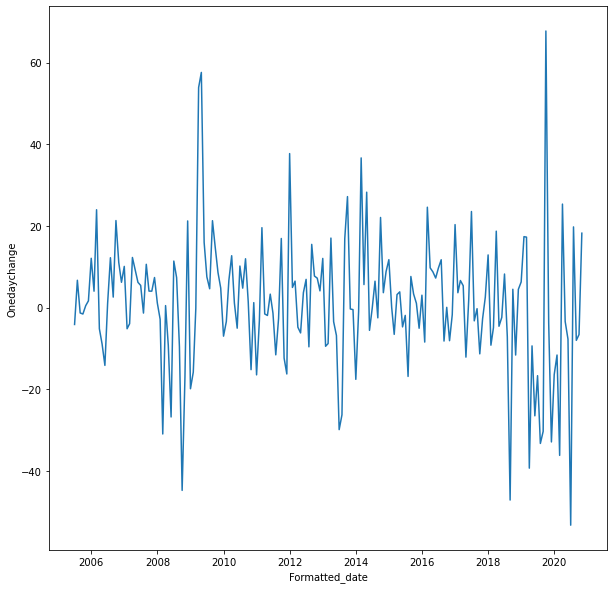

In [537]:
# Chart - 7 visualization code
plt.rcParams["figure.figsize"] = (10,10)

sns.lineplot(data=df,x='Formatted_date',y='Onedaychange')


In [538]:
df.tail(20)

,Date,Open,High,Low,Close,year,Onedaychange,singledaychange_low_high,Formatted_date,month,Result,daily_opening_change,daily_opening
165,Apr-19,277.00,285.90,165.30,168.00,19,-39.350181,72.958258,2019-04-01,Apr,negative,1.95,Gap_up
166,May-19,163.30,178.05,133.05,147.95,19,-9.399878,33.821871,2019-05-01,May,negative,-4.70,Gap_Down
167,Jun-19,147.95,153.80,98.75,108.70,19,-26.529233,55.746835,2019-06-01,Jun,negative,0.00,unchanged
168,Jul-19,109.60,110.60,81.75,91.30,19,-16.697080,35.290520,2019-07-01,Jul,negative,0.90,Gap_up
169,Aug-19,89.20,92.40,53.15,59.50,19,-33.295964,73.847601,2019-08-01,Aug,negative,-2.10,Gap_Down
170,Sep-19,59.50,72.55,40.95,41.45,19,-30.336134,77.167277,2019-09-01,Sep,negative,0.00,unchanged
171,Oct-19,42.00,76.65,29.05,70.45,19,67.738095,163.855422,2019-10-01,Oct,positive,0.55,Gap_up
172,Nov-19,71.00,75.35,59.95,68.30,19,-3.802817,25.688073,2019-11-01,Nov,negative,0.55,Gap_up
173,Dec-19,70.00,70.50,40.70,46.95,19,-32.928571,73.218673,2019-12-01,Dec,negative,1.70,Gap_up
174,Jan-20,46.90,48.50,36.55,39.20,20,-16.417910,32.694938,2020-01-01,Jan,negative,-0.05,Gap_Down


##### 1. Why did you pick the specific chart?

To check the perecentage of change in price for month

##### 2. What is/are the insight(s) found from the chart?

Mean average change or percantage in month is 1% and in the month of mar-2020 it had a high volalitiy of around 1484% and mar-2020 is most month is the yes bank price history.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight for the business, as we are checking the stock price.

#### Chart - 4

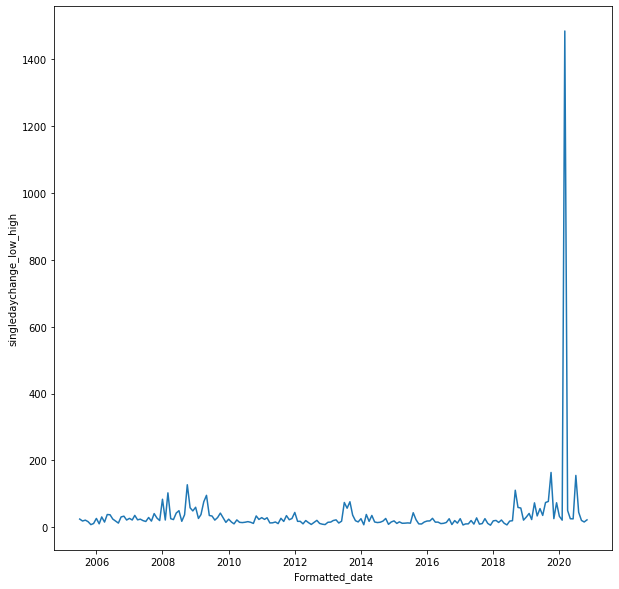

In [539]:
# Chart - 8 visualization code
sns.lineplot(data=df,x='Formatted_date',y='singledaychange_low_high')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight for the business, as we are checking the stock price.

#### Chart - 5

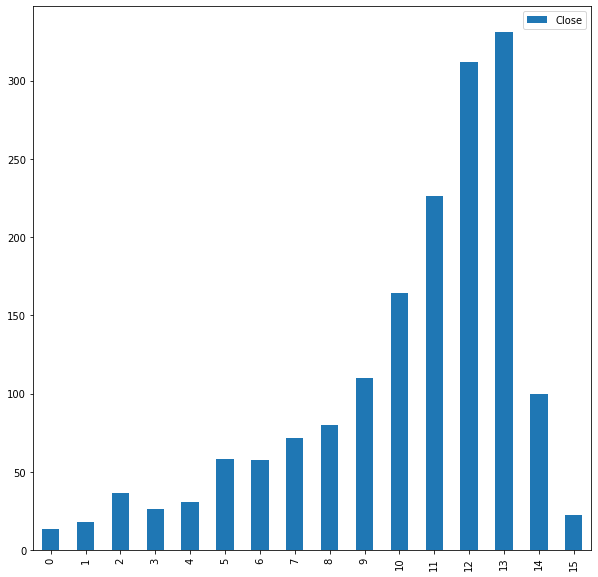

In [540]:
# Chart - 2 visualization code
df_avg_price_year.plot(kind='bar',label = 'year')


##### 1. Why did you pick the specific chart?

To check trend in the price thorugh the year.

##### 2. What is/are the insight(s) found from the chart?

The stock as performed well till 2018 and after that there was a huge surge in the stock price due to bank Non perferring assest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight for the business, as we are checking the stock price.

#### Chart - 6

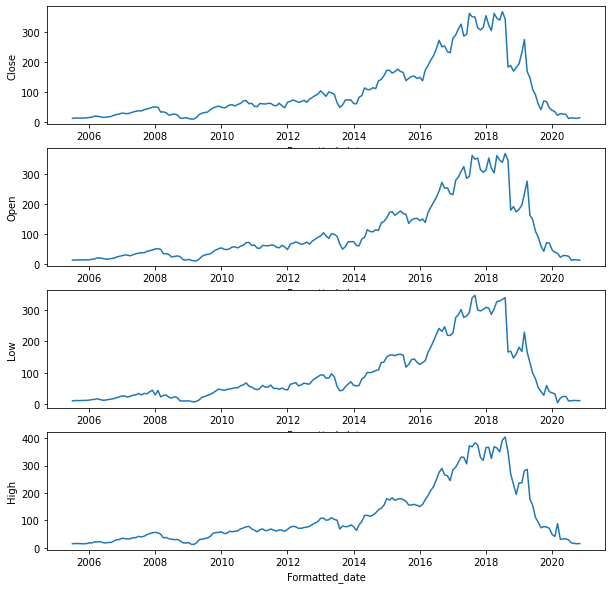

In [541]:
# Chart - 1 visualization code
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(4)
sns.lineplot(data=df,x='Formatted_date',y='Close',ax = ax[0])
sns.lineplot(data=df,x='Formatted_date',y='Open',ax=ax[1])
sns.lineplot(data=df,x='Formatted_date',y='Low',ax=ax[2])
sns.lineplot(data=df,x='Formatted_date',y='High',ax=ax[3])


##### 1. Why did you pick the specific chart?

To check the trend of the price with all the features

##### 2. What is/are the insight(s) found from the chart?

Open, low, high and close all the data trend are similar to each, so there are highly correlated with each other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight for the business, as we are checking the stock price.

#### Chart - 7

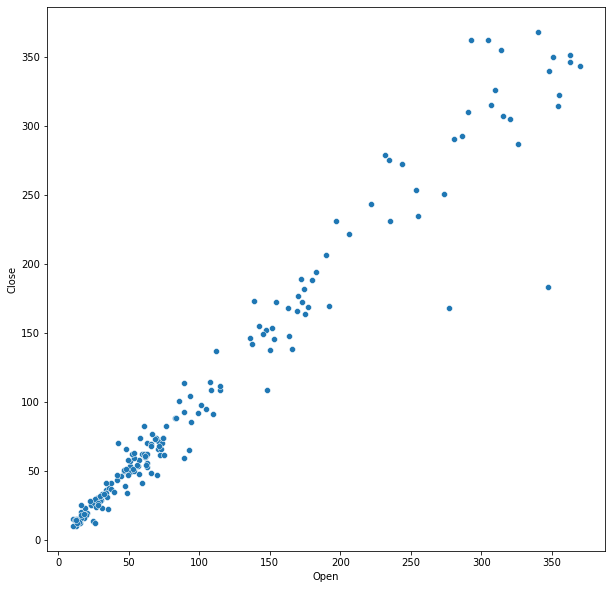

In [542]:
# Chart - 5 visualization code
sns.scatterplot(data=df,x='Open',y='Close')

##### 1. Why did you pick the specific chart?

To check the releationship between the open and close price.

##### 2. What is/are the insight(s) found from the chart?

From the graph we can see they are following the linear pattern.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight for the business, as we are checking the stock price.

#### Chart - 8

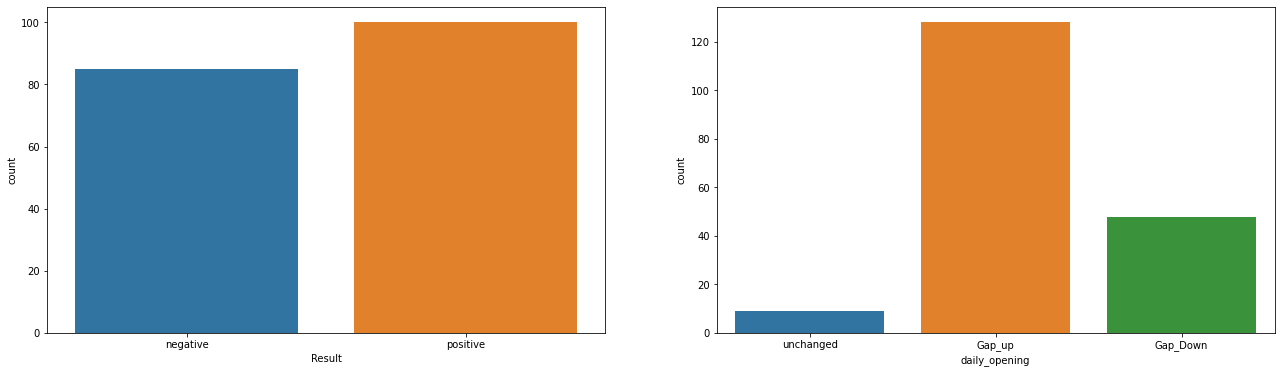

In [543]:
# Chart - 6 visualization code
fig, axes = plt.subplots(1, 2, figsize=(22, 6))
ax = axes.flatten()
sns.countplot(data = df, x ='Result',ax = ax[0])
sns.countplot(data = df, x ='daily_opening',ax = ax[1])

##### 1. Why did you pick the specific chart?

To check the proporation of the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

In a month it had around 100 months of positive impact and 85 negative impact in the stock price.

In a month it had around 128 months gap up and 48 months of gap down and 9 months of unchanged.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight for the business, as we are checking the stock price.

#### Chart - 9 - Correlation Heatmap

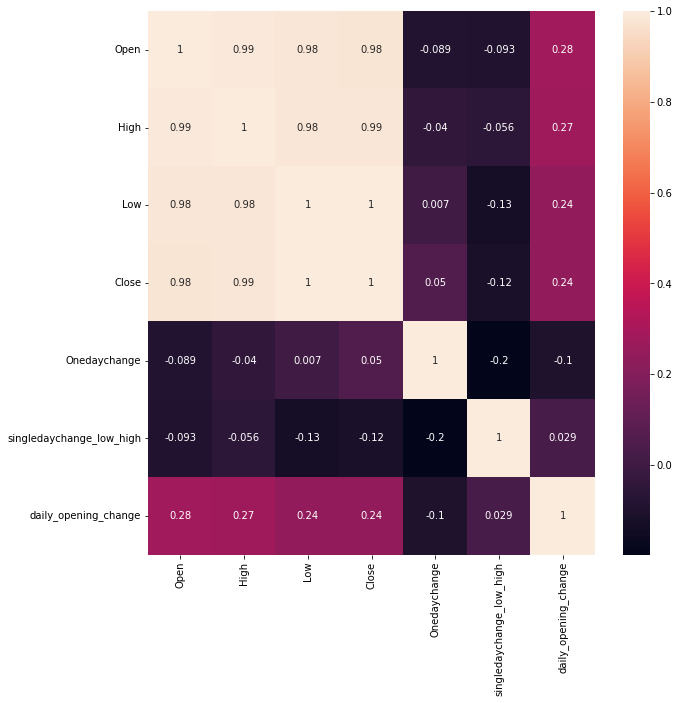

In [544]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr(),annot = True)

##### 1. Why did you pick the specific chart?

To find the correlation between the features.

##### 2. What is/are the insight(s) found from the chart?

Open, high, close and low are highly correlated with one another, so we take only one column for the ML model.

#### Chart - 10 - Pair plot

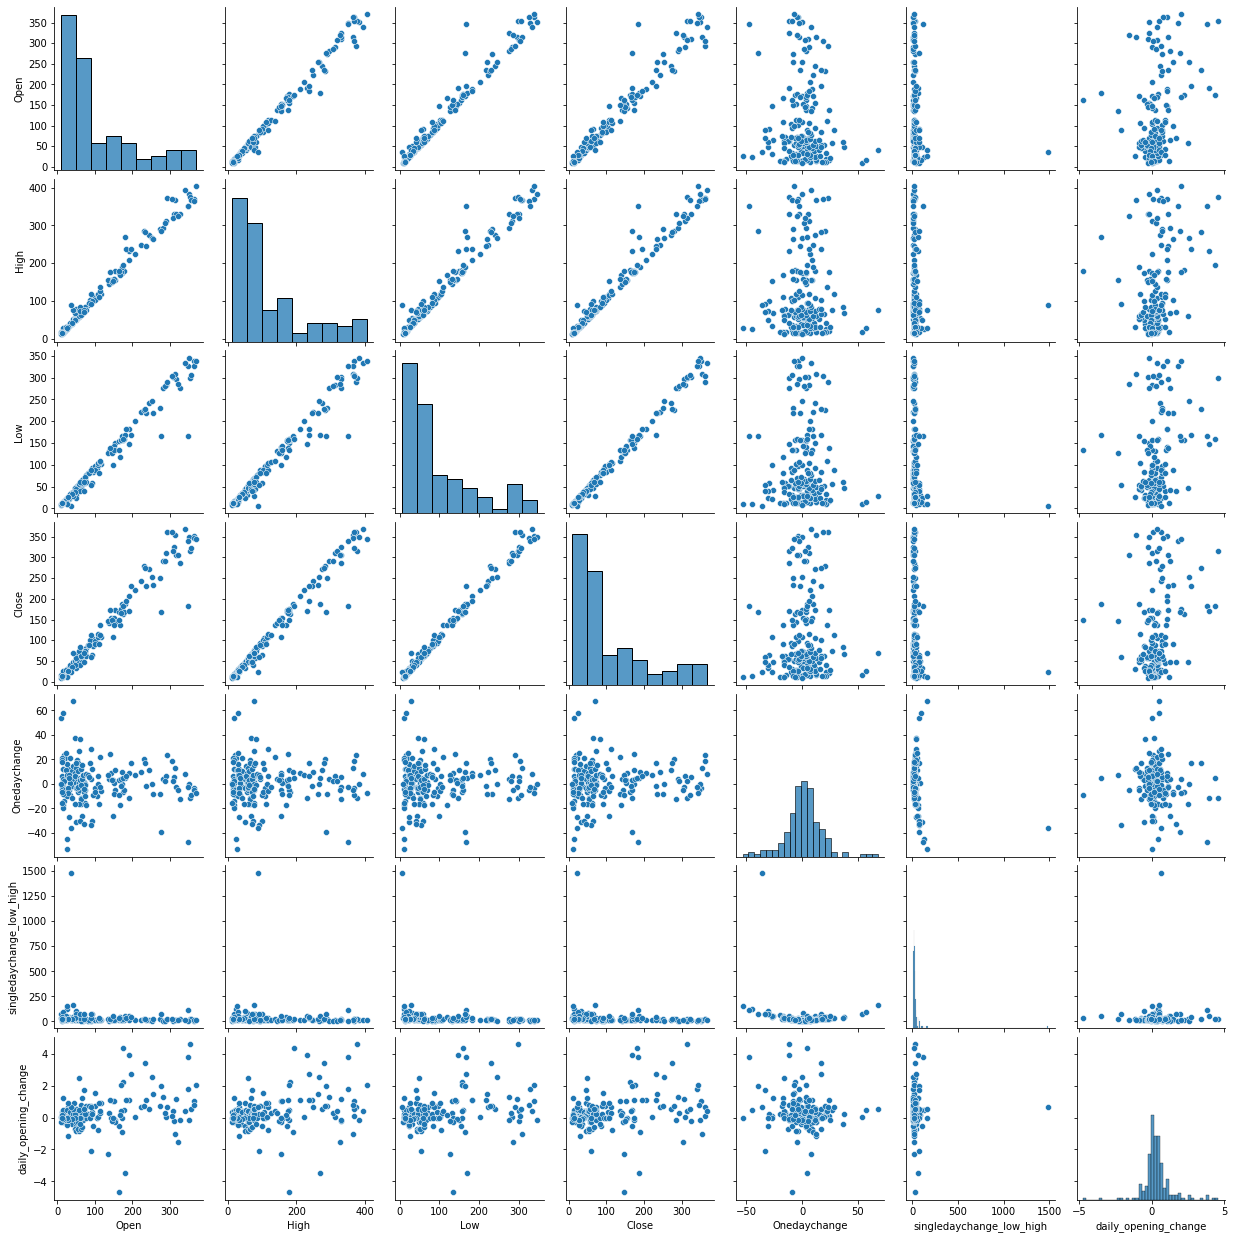

In [545]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

To check the relationship betwee the two variables.

##### 2. What is/are the insight(s) found from the chart?

Open, high, low and close are linearly related and the data are highly skewed to the right 

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null hypotheis = 105 and alternate hypothesis is != 105

#### 2. Perform an appropriate statistical test.

In [546]:
# Perform Statistical Test to obtain P-value
from statistics import mean
import statistics
import scipy.stats as stats
mean = mean(df['Open'])
std_dev = statistics.stdev(df['Open'])
print(mean,std_dev)

105.54140540540541 98.87984957695843


In [547]:
import math
score = (350-mean)/(std_dev)
print(score)

2.472279191771341


In [548]:
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(abs(score)))
print(p_value)


0.01342546217755225


##### Which statistical test have you done to obtain P-Value?

Used z-score to find the p-value

##### Why did you choose the specific statistical test?

as we now the population mean and population std so we have used to z-score test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [551]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Date                        0
Open                        0
High                        0
Low                         0
Close                       0
year                        0
Onedaychange                0
singledaychange_low_high    0
Formatted_date              0
month                       0
Result                      0
daily_opening_change        0
daily_opening               0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No null values in the dataset, so there no need of imputation

### 2. Handling Outliers

In [552]:
# Handling Outliers & Outlier treatments
Open_95 = np.percentile(df['Open'],95)
Close_95 = np.percentile(df['Close'],95)
Low_95 = np.percentile(df['Low'],95)
High_95 = np.percentile(df['High'],95)
print(Open_95,Close_95,Low_95,High_95)

324.9399999999999 325.3619999999999 300.55999999999995 361.53999999999974


In [553]:
# df.loc[df['Open'] >= Open_95,'Open'] = Open_95
# df.loc[df['Close'] >= Close_95,'Close'] = Close_95
# df.loc[df['Low'] >= Low_95,'Low'] = Low_95
# df.loc[df['High'] >= High_95,'High'] = High_95


In [554]:
df.drop(['Result','Date','year','Onedaychange','singledaychange_low_high','Formatted_date','month','daily_opening_change','daily_opening'],inplace = True,axis = 1)

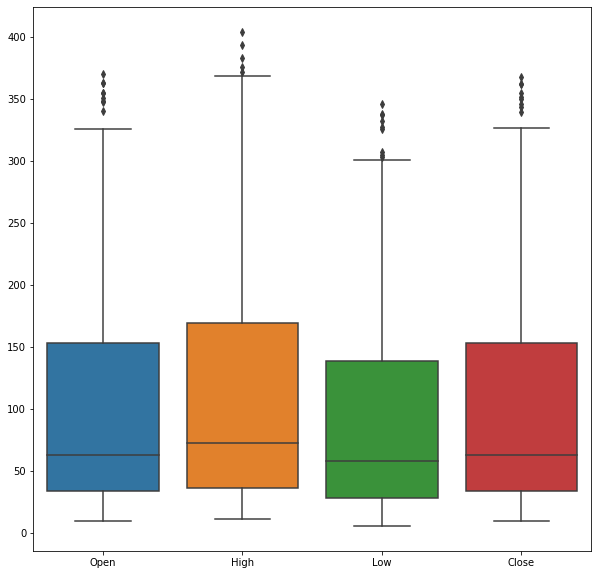

In [555]:
sns.boxplot(data = df)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Used winsorization technique to update the outiler to the 95th percentile value in respective columns.

Outiler values is legitimate data points and we need the values to calculate.However it is necessary to update the date point for the analysis, so we have update the most exterme data point to less exterme data point.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [556]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [557]:
# Select your features wisely to avoid overfitting

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [558]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Close','High']]])

,variables,VIF
0,Open,65.64384
1,Low,65.64384


##### What all feature selection methods have you used  and why?

variance inflation factor method is used to check the mutlicollineariity between the column and we have used the threshold of 10 and droping the column whichever the value is greater than 10

##### Which all features you found important and why?

Open features is the only feature we have considered the remaning feature are highly corealated so we dropped those column

### 4. Data Transformation

#### The data is skewed right so we are using the log transformation technique to reduce the skewness and make the data more symmetrical

In [559]:
# Transform Your data
X = np.log10(df['Open'])
y = np.log10(df['Close'])



### 5. Data Scaling

In [560]:
# Scaling your data

std = StandardScaler()
X = X.values.reshape(-1,1)
X = std.fit_transform(X)
y = y.values.reshape(-1,1)
y = std.transform(y)





##### Using the standardisation technique to preserve the shape of the distribution as the feature follow the normal distribution, so we are using the standardisation technique

### 6. Data Splitting

In [561]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(148, 1)
(37, 1)


##### What data splitting ratio have you used and why? 

We have used 80/20 ratio means 80% percentage to train and 20% percentage to testing the data.

## ***7. ML Model Implementation***

### ML Model - 1

In [562]:
# ML Model - 1 Implementation

# Fit the Algorithm


reg = LinearRegression().fit(X_train, y_train)

# Predict on the model
reg.score(X_train, y_train)

0.966055678539003

In [563]:
ridge = Ridge(alpha = 0.1)

# Fit the Algorithm
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [564]:
ridge.score(X_train,y_train)

0.9660552110653181

In [565]:
reg.coef_

array([[0.98289747]])

In [566]:
y_pred_ridge = ridge.predict(X_test)

In [567]:
y_pred_r1 = ridge.predict(X_test)

In [568]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r1))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r1))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r1)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 21.206358965880803
RMSE : 4.605036261082078
R2 : 0.8971344995922097
Adjusted R2 :  0.8941954852948443


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [569]:
# Visualizing evaluation Metric Score chart


MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r1))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 21.206358965880803
RMSE : 4.605036261082078


In [570]:

r2 = r2_score(10**(y_test), 10**(y_pred_r1))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r1)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8971344995922097
Adjusted R2 :  0.8941954852948443


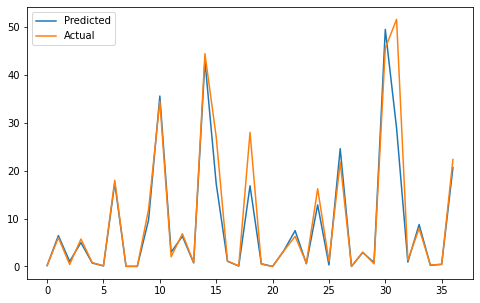

In [571]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_r1))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [572]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,0.1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

# Predict on the model

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 0.1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [573]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.03528326498373566


In [574]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 21.206358965880803
RMSE : 4.605036261082078
R2 : 0.8971344995922097
Adjusted R2 :  0.8941954852948443


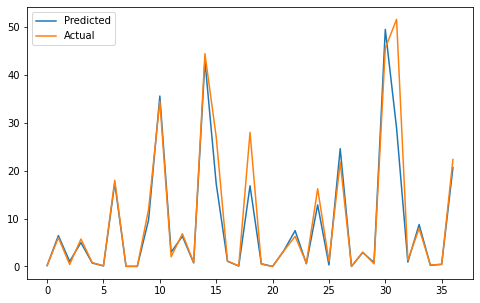

In [575]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [576]:
# Visualizing evaluation Metric Score chart
lasso = Lasso(alpha=0.1)


lasso.fit(X_train, y_train)



Lasso(alpha=0.1)

In [577]:
lasso.score(X_train, y_train)

0.955441935042964

In [578]:
y_pred_r = lasso.predict(X_test)

In [579]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 58.2544676625889
RMSE : 7.632461441932668
R2 : 0.7174255619862487
Adjusted R2 :  0.7093520066144273


#### 2. Cross- Validation & Hyperparameter Tuning

In [580]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
# Fit the Algorithm

# Predict on the model

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03530606045027503


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [581]:
# ML Model - 3 Implementation
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)


# Predict on the model

In [582]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [583]:
elasticnet.score(X_train, y_train)

0.9566198432312963

In [584]:
y_pred_en = elasticnet.predict(X_test)

In [585]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 55.38917475154164
RMSE : 7.44239039230956
R2 : 0.7313242133098438
Adjusted R2 :  0.7236477622615536


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

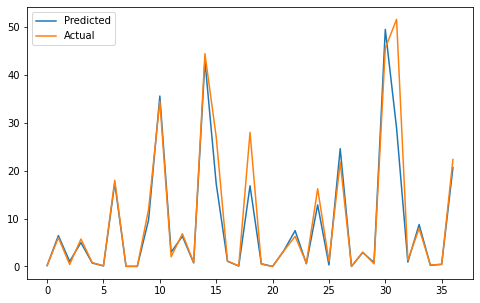

In [586]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_r1))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [587]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# Hyperprarameter tuning

elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)
# Predict on the model

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [588]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [589]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.3}

Using  {'alpha': 0.001, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.03491024995396058


In [590]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 21.256871298876348
RMSE : 4.610517465412787
R2 : 0.8968894798592744
Adjusted R2 :  0.8939434649981108


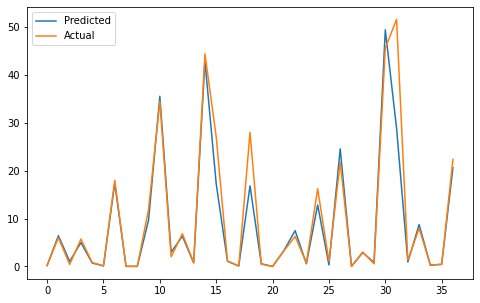

In [591]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [592]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [593]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***